# Practical 11
## AIM : To implement k-means clustering.

In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
from sklearn.datasets import load_iris

In [9]:
iris = load_iris()
X = iris.data

In [10]:
feature_names = iris.feature_names
df_X = pd.DataFrame(X, columns=feature_names)
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [11]:
def compute_sse(X, centroids, labels):
    sse = 0
    for i in range(len(X)):
        sse += np.linalg.norm(X[i] - centroids[labels[i]]) ** 2
    return sse

In [12]:
def KMeans_M(X, k, max_iter=100):
    np.random.seed(42)
    centroids = X[np.random.choice(len(X), k, replace=False)]
    for _ in range(max_iter):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([
            X[labels == i].mean(axis=0) if np.any(labels == i) else centroids[i]
            for i in range(k)
        ])
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return centroids, labels

In [13]:
k_range = range(2,7)
sse_manual = []
sse_sklearn = []

In [14]:
for k in k_range:
    centroids, labels = KMeans_M(X, k)
    sse_manual.append(compute_sse(X, centroids, labels))

    sk_kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    sk_kmeans.fit(X)
    sse_sklearn.append(sk_kmeans.inertia_)

In [15]:
print("k_range:", list(k_range))
print("len(sse_manual):", len(sse_manual))
print("len(sse_sklearn):", len(sse_sklearn))

k_range: [2, 3, 4, 5, 6]
len(sse_manual): 5
len(sse_sklearn): 5


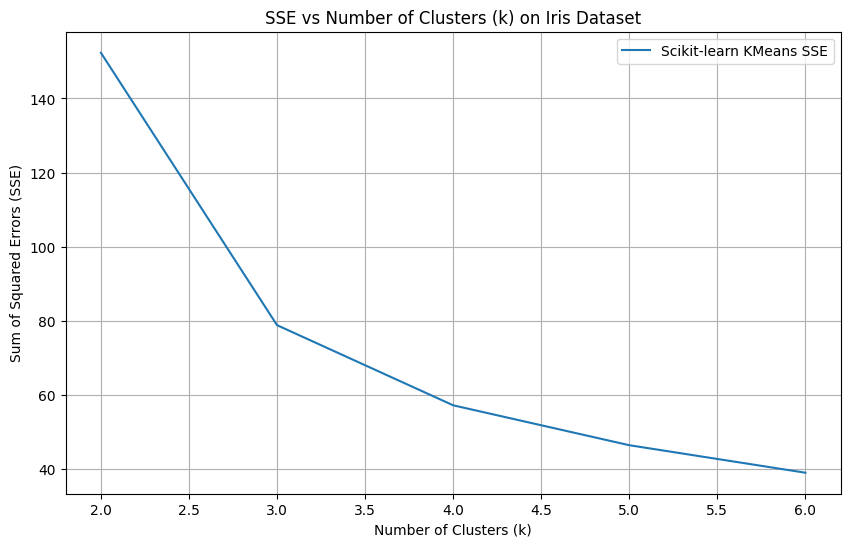

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(list(k_range), sse_sklearn, label='Scikit-learn KMeans SSE')
plt.title('SSE vs Number of Clusters (k) on Iris Dataset')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.legend()
plt.grid(True)
plt.show()

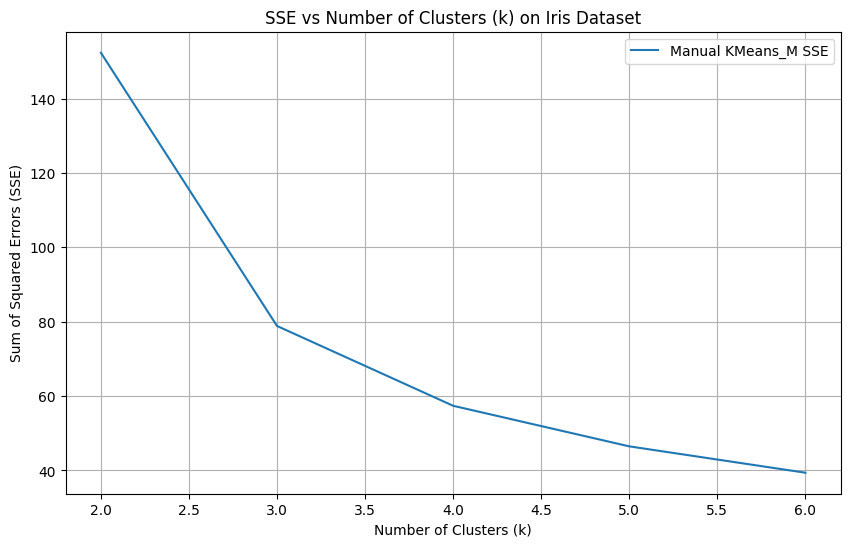

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(list(k_range), sse_manual,label='Manual KMeans_M SSE')
plt.title('SSE vs Number of Clusters (k) on Iris Dataset')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.legend()
plt.grid(True)
plt.show()

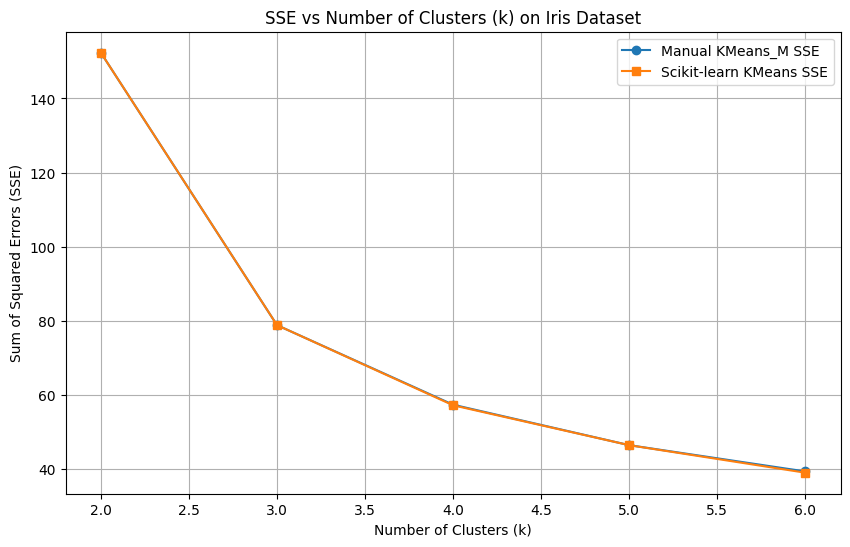

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(list(k_range), sse_manual, marker='o', label='Manual KMeans_M SSE')
plt.plot(list(k_range), sse_sklearn, marker='s', label='Scikit-learn KMeans SSE')
plt.title('SSE vs Number of Clusters (k) on Iris Dataset')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.legend()
plt.grid(True)
plt.show()